In [ ]:
!pip install category_encoders

     |████████████████████████████████| 82 kB 444 kB/s 


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from itertools import product

## Часть 1. Обучение моделей классификации (5 баллов). 

Поработайте с датасетом telecom_churn. Вам предстоит по характеристикам клиента предсказать, уйдет он или нет (целевая колонка - Churn).

A. Решите задачу с помощью логистической регрессии:
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

B. Решите задачу с помощью метода опорных векторов (с kernel = 'linear'):
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

Не забудьте масштабировать данные перед применением линейных моделей.

C. Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

D. Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты C и D можно скомбинировать для достижения наилучшего качества.

E. Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик accuracy, f1-score и ROC-AUC? 
(Вы можете изначально разбить данные на train и test и сравнивать значения метрик на этих выборках; или же можно оценивать качество алгоритмов по кросс-валидации).

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
df = pd.read_csv('telecom_churn.csv')
cat_columns = df.select_dtypes(['object']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.factorize()[0])
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,0,128,415,0,0,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,1,107,415,0,0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,2,137,415,0,1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,1,84,408,1,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,3,75,415,1,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,20,192,415,0,0,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,8,68,415,0,1,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,10,28,510,0,1,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,49,184,510,1,1,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Churn'])
y = df.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

grid_params = {
    "C": np.arange(0, 1.01, 0.01),
}
logit = LogisticRegression(random_state=0)
grid_search = GridSearchCV(logit, grid_params, n_jobs = -1)
grid_search.fit(X_train, y_train)

print(f'Accuracy score for train: {grid_search.score(X_train, y_train)}')
print(f'Accuracy score for test: {grid_search.score(X_test, y_test)}')
print(f'best estimator_: {grid_search.best_estimator_}')

Accuracy score for train: 0.8619654913728432
Accuracy score for test: 0.8740629685157422
best estimator_: LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
logit = LogisticRegression(random_state=0, C=0.02)
logit.fit(X_train, y_train)
logit.coef_

array([[ 0.03799433,  0.04478285, -0.01382273,  0.51335625,  0.24810333,
        -0.07307627,  0.33098273,  0.02060512,  0.33100818,  0.14055666,
         0.01252284,  0.14061484,  0.08003693,  0.0007203 ,  0.07993019,
         0.08204657, -0.1374497 ,  0.08391476,  0.57401597]])

In [ ]:
from sklearn.svm import SVC

grid_params = {
    "C": np.arange(0, 1.01, 0.01)
}
svc = SVC(kernel='linear', random_state=0)
grid_search = GridSearchCV(svc, grid_params, n_jobs = -1)
grid_search.fit(X_train, y_train)

print(f'Accuracy score for train: {grid_search.score(X_train, y_train)}')
print(f'Accuracy score for test: {grid_search.score(X_test, y_test)}')
print(f'best estimator_: {grid_search.best_estimator_}')

Accuracy score for train: 0.8518379594898725
Accuracy score for test: 0.8680659670164917
best estimator_: SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)


Обе модели показали достаточно высокое качество обучения. При этом признаки переобучения отсутствуют. О недообучении также сложно уверенно говорить, т.к. разница между train и test ~ 1%.

У логистической регрессии качество немного лучше

### Полиномы

0.860086711498057
0.8979706417634616
0.9058526747756673
0.8904757889411219
0.8818460976312442
optimal degree is: 3


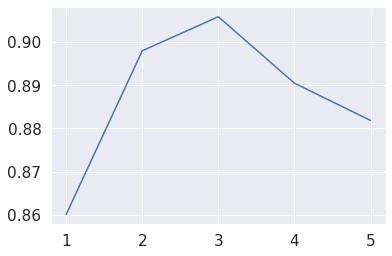

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def degree_opt(X, y, degree):
  poly_features = PolynomialFeatures(degree = degree)
  X_poly = poly_features.fit_transform(X)
  X_std = ss.fit_transform(X_poly)
  logit = LogisticRegression(random_state=0, C=0.02)
  scores = cross_val_score(logit, X_std, y, cv=5)
  print(scores.mean())
  return scores.mean()

space = np.arange(1, 6, 1)
results = [degree_opt(X_train, y_train, x) for x in space]
degrees = [x for x in space]
plt.plot(degrees, results)

print('optimal degree is:', np.round(degrees[np.argmax(results)],2))

Оптимальное количество степеней полиномиальной модели -- 3, но будем использовать 2, т.к. такая модель проще и разница в качестве не очень большая

0.8518378762007153
0.8998482197440817
0.890099149046806
optimal degree is: 2


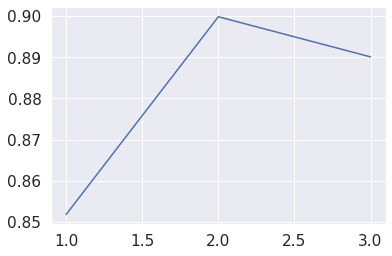

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def degree_opt(X, y, degree):
  poly_features = PolynomialFeatures(degree = degree)
  X_poly = poly_features.fit_transform(X)
  X_std = ss.fit_transform(X_poly)
  logit = SVC(kernel='linear', random_state=0, C=0.01)
  scores = cross_val_score(logit, X_std, y, cv=5)
  print(scores.mean())
  return scores.mean()

space = np.arange(1, 4, 1)
results = [degree_opt(X_train, y_train, x) for x in space]
degrees = [x for x in space]
plt.plot(degrees, results)

print('optimal degree is:', np.round(degrees[np.argmax(results)],2))

Для SVC оптимальная степень равна 2

### Корреляционный анализ

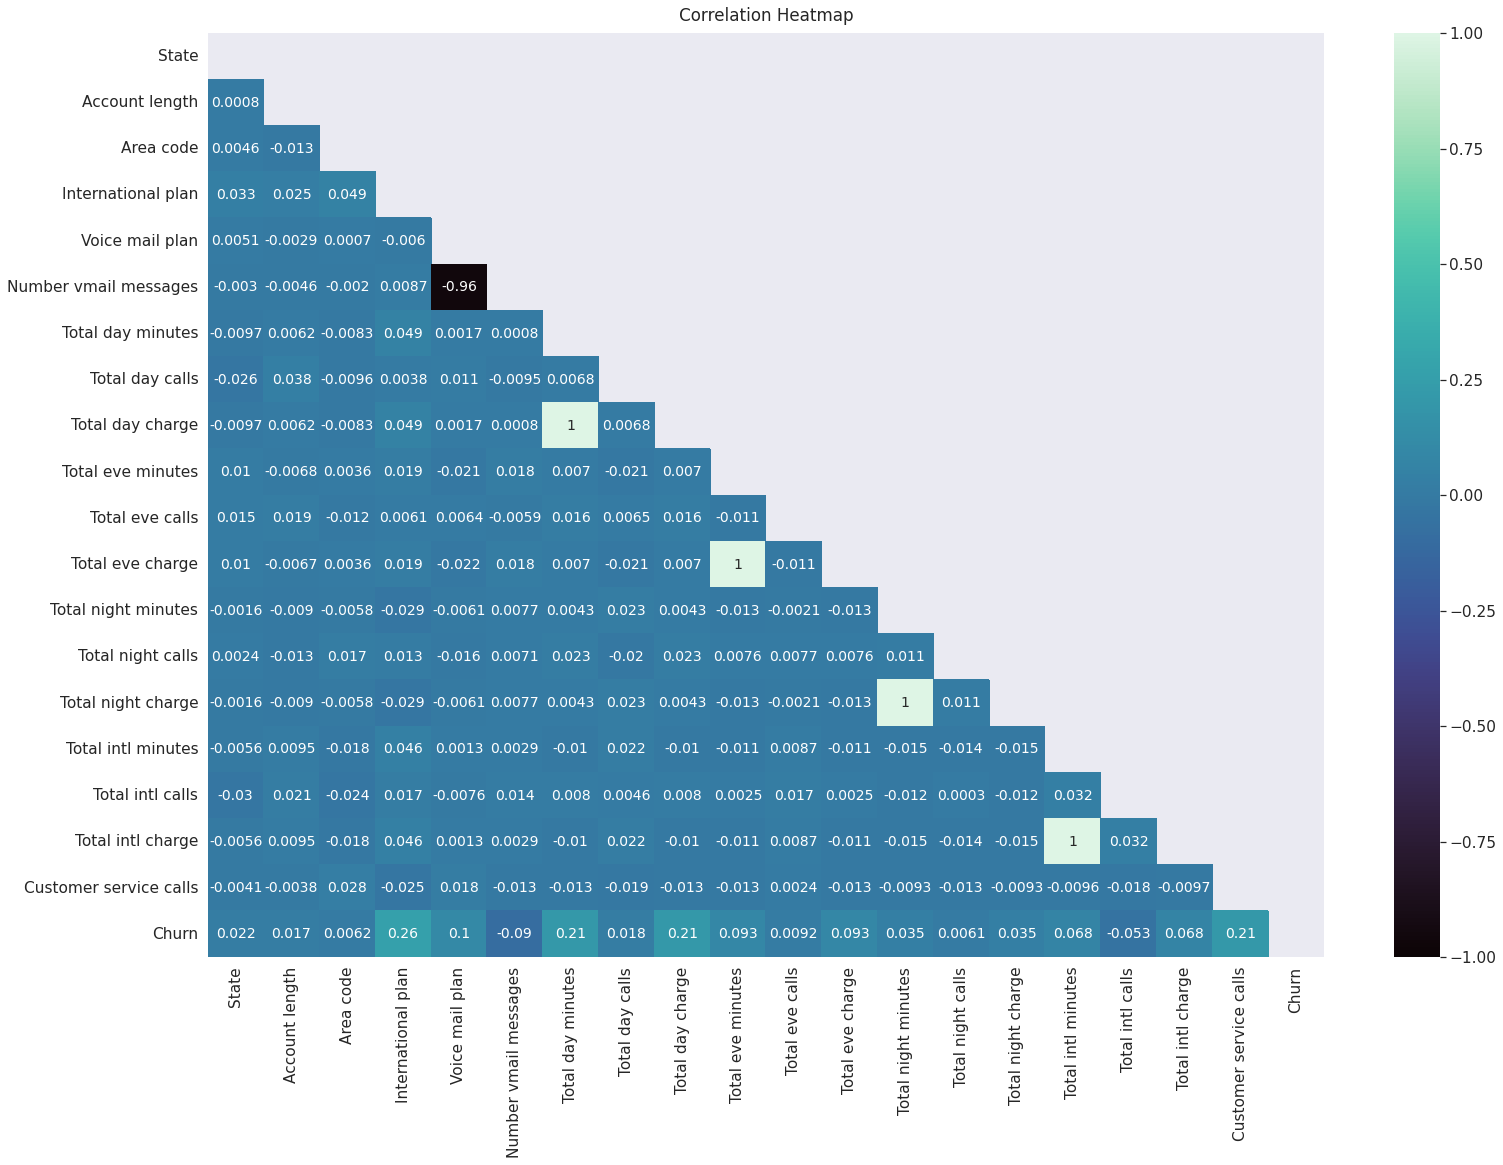

In [ ]:
import seaborn as sns

plt.figure(figsize=(25, 17))
sns.set(font_scale=1.4)
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
heatmap = sns.heatmap(corr.round(4), mask=mask, vmin=-1, vmax=1, annot = True, annot_kws={"size": 14}, cmap = "mako")
heatmap.set_title('Correlation Heatmap', pad=12);

Имеем 5 пар крайне сильно скоррелированных между собой переменных. Удалим те из них, которые имеют меньшую корреляцию с таргетом (если корреляция одинаковая, то случайным образом):



1.   Number vmail messages
2.   Total day charge
3.   Total eve charge
4.   Total night charge
5.   Total intl charge


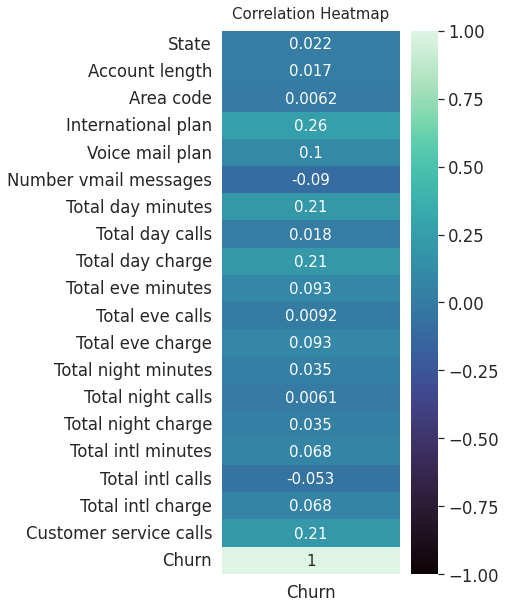

In [ ]:
plt.figure(figsize=(4, 10))
sns.set(font_scale=1.5)
heatmap = sns.heatmap(corr[["Churn"]], vmin=-1, vmax=1, annot = True, annot_kws={"size": 15}, cmap = "mako")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':15}, pad=12);

### Финальные модели

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=df.columns[df.columns.str.endswith(('charge', 'messages', 'Churn'))])
y = df.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

ss = StandardScaler()
poly_features = PolynomialFeatures(degree = 2)
X_train = ss.fit_transform(poly_features.fit_transform(X_train))
X_test = ss.transform(poly_features.transform(X_test))

Accuracy score for train: 0.8808401200171453
Accuracy score for test: 0.888 

F1 score for train: 0.4326530612244898
F1 score for test: 0.42857142857142866 

Roc-Auc score for train: 0.6438143352870849
Roc-Auc score for test: 0.6428931705840815


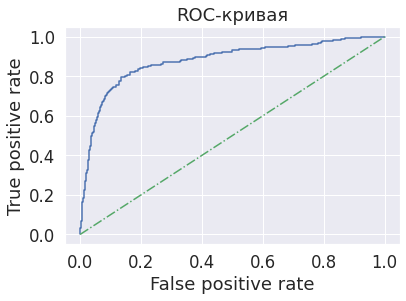

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc

logit = LogisticRegression(random_state=0, C=0.02)
logit.fit(X_train, y_train)

print(f'Accuracy score for train: {logit.score(X_train, y_train)}')
print(f'Accuracy score for test: {logit.score(X_test, y_test)} \n')
print(f'F1 score for train: {f1_score(y_train, logit.predict(X_train))}')
print(f'F1 score for test: {f1_score(y_test, logit.predict(X_test))} \n')
print(f'Roc-Auc score for train: {roc_auc_score(y_train, logit.predict(X_train))}')
print(f'Roc-Auc score for test: {roc_auc_score(y_test, logit.predict(X_test))}')

preds = logit.predict_proba(X_train)[:,1]
fpr, tpr, threshold = roc_curve(y_train, preds)
roc_auc = auc(fpr, tpr)

plt.title('ROC-кривая')
plt.plot(fpr,tpr, 'b')
plt.plot([0,1], [0,1], 'g-.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

Accuracy score for train: 0.8748392627518217
Accuracy score for test: 0.884 

F1 score for train: 0.31775700934579443
F1 score for test: 0.3176470588235294 

Roc-Auc score for train: 0.5947780888227917
Roc-Auc score for test: 0.5949258549379602


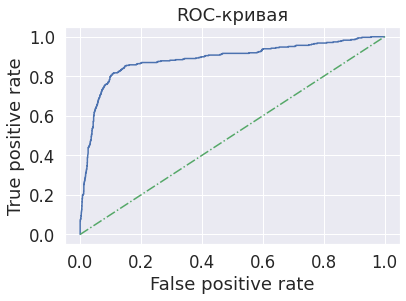

In [ ]:
svc = SVC(kernel='linear', random_state=0, C=0.01, probability=True)
svc.fit(X_train, y_train)

print(f'Accuracy score for train: {svc.score(X_train, y_train)}')
print(f'Accuracy score for test: {svc.score(X_test, y_test)} \n')
print(f'F1 score for train: {f1_score(y_train, svc.predict(X_train))}')
print(f'F1 score for test: {f1_score(y_test, svc.predict(X_test))} \n')
print(f'Roc-Auc score for train: {roc_auc_score(y_train, svc.predict(X_train))}')
print(f'Roc-Auc score for test: {roc_auc_score(y_test, svc.predict(X_test))}')

preds = svc.predict_proba(X_train)[:,1]
fpr, tpr, threshold = roc_curve(y_train, preds)
roc_auc = auc(fpr, tpr)

plt.title('ROC-кривая')
plt.plot(fpr,tpr, 'b')
plt.plot([0,1], [0,1], 'g-.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

Мы видим, что **после удаления мультиколлинеарных признаков качество моделей практически не изменилось** при этом сама модель стала проще, что, несомненно, является плюсом

**Наилучшей моделью является логистическая** по метрикам F1 и ROC-AUC. По Accuracy различие в моделях несущественно.

В модели в качестве дополнительных переменных **были добавлены полиномы второй степени**

Также **не наблюдается переобучения/недообучения**. Различие в качестве моделей на тренировочной и тестовой выборках минимально

## Часть 2. Оценка качества моделей классификации (5 баллов).

* Колонки 0, 1, ..., 13 - анонимизированные характеристики клиентов (некоторые числовые, некоторые категориальные). 
* Target - целевая переменная: 1 - выдать кредит, 0 - не выдать кредит.

На этих данных было обучено три различных алгоритма классификации и получены предсказания:
* pred1_probs - предсказанные вероятности положительного класса, полученные алгоритмом 1.
* pred1_classes - предсказанные алгоритмом 1 классы
* pred2_probs, pred2_classes, pred3_probs, pred3_classes - аналогичные величины для алгоритмов 2 и 3

Наша задача - оценить качество каждого из трех алгоритмов и разобраться, какой из алгоритмов лучше всего работает в данной задаче.

In [ ]:
df = pd.read_csv("credit_scoring_example1.csv")
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1,0.480904,0,0.526646,1,0.260169,0


In [ ]:
df.shape

(689, 21)

**Задание 1.** Проверьте target на сбалансированность по классам, сделайте вывод.

In [ ]:
print(f"target = 1: {df.target.sum()} ({np.round(df.target.sum()/df.shape[0], 2)})")
print(f"target = 0: {df.shape[0] - df.target.sum()}  ({np.round(1 - df.target.sum()/df.shape[0], 2)})")

target = 1: 307 (0.45)
target = 0: 382  (0.55)


таргет достаточно сбалансирован. классы имеют практически равные доли

**Задание 2.** Вычислите accuracy - долю правильных ответов каждого из алгоритмов. Какой алгоритм имеет наибольшую accuracy?

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f'accuracy of 1-st algoritm: {np.round(accuracy_score(df.target, df.pred1_classes), 2)}')
print(f'accuracy of 2-nd algoritm: {np.round(accuracy_score(df.target, df.pred2_classes), 2)}')
print(f'accuracy of 3-rd algoritm: {np.round(accuracy_score(df.target, df.pred3_classes), 2)}')

accuracy of 1-st algoritm: 0.66
accuracy of 2-nd algoritm: 0.67
accuracy of 3-rd algoritm: 0.64


Наилучший алгоритм по accuracy -- второй

**Задание 3.** Теперь вычислите точность и полноту каждого из алгоритмов.

In [ ]:
pr1 = np.round(precision_score(df.target, df.pred1_classes), 3)
pr2 = np.round(precision_score(df.target, df.pred2_classes), 2)
pr3 = np.round(precision_score(df.target, df.pred3_classes), 2)
rec1 = np.round(recall_score(df.target, df.pred1_classes), 2)
rec2 = np.round(recall_score(df.target, df.pred2_classes), 2)
rec3 = np.round(recall_score(df.target, df.pred3_classes), 2)
print(f'precision and recall of 1-st algoritm: {pr1, rec1}')
print(f'precision and recall of 2-nd algoritm: {pr2, rec2}')
print(f'precision and recall of 3-rd algoritm: {pr3, rec3}')

precision and recall of 1-st algoritm: (0.691, 0.44)
precision and recall of 2-nd algoritm: (0.61, 0.73)
precision and recall of 3-rd algoritm: (0.69, 0.35)


Самым полезным инструментом в практических задачах является ***матрица ошибок***. Смотря на неё и регулируя порог, определяющий классы, мы можем достичь оптимального решения нашей задачи.

**Задание 4.** Используя функцию plot_confusion_matrix для визуализации матрицы ошибок, нарисуйте матрицы ошибок всех трех алгоритмов.

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

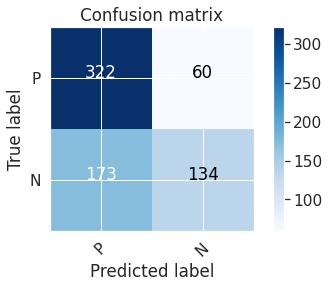

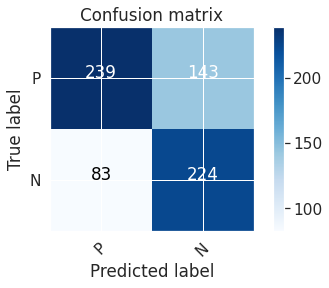

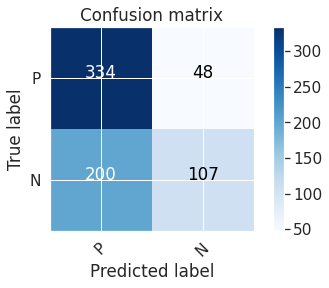

In [ ]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(df.target, df.pred1_classes)
cm2=confusion_matrix(df.target, df.pred2_classes)
cm3=confusion_matrix(df.target, df.pred3_classes)
plot_confusion_matrix(cm1, ['P', 'N'])
plot_confusion_matrix(cm2, ['P', 'N'])
plot_confusion_matrix(cm3, ['P', 'N'])

Давайте определимся с целями нашего предсказания:
    
* **Вариант 1**: хотим выдать кредит максимальному числу людей среди тех, кто мог бы его вернуть. При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того полнота должна быть как можно больше (число в левом нижнем квадрате матрицы ошибок минимально).

**Задание 5.** Для каждого алгоритма найдите такой порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной полноты можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

**Комментарий:** порог можно искать в цикле с небольшим шагом.

In [ ]:
def max_metrics(probs, max):
  res, best_eps = (0, 0)
  for eps in np.arange(0.01, 1.1, 0.01):
    cl = probs > eps
    accuracy = accuracy_score(df.target, cl)
    if max == 'precision':
      res_new = precision_score(df.target, cl)
    elif max == 'recall':
      res_new = recall_score(df.target, cl)
    elif max == 'f1':
      res_new = f1_score(df.target, cl)
    if accuracy >= 0.65 and res_new > res:
      res = res_new
      best_eps = eps
  return np.round(res, 3), np.round(best_eps, 3)

In [ ]:
print(max_metrics(df.pred1_probs, max='recall'))
print(max_metrics(df.pred2_probs, max='recall'))
print(max_metrics(df.pred3_probs, max='recall'))

(0.743, 0.36)
(0.837, 0.27)
(0, 0)


У третьего алгоритма отсутствует такой порог принятия решения для которого accuracy  ≥  0.65. 

Ближайший порог:

In [ ]:
rec, best_eps, acc = (0, 0, 0)
for eps in np.arange(0.01, 0.5, 0.01):
  cl = df.pred3_probs > 0.5 - eps
  accuracy_new = accuracy_score(df.target, cl)
  rec_new = recall_score(df.target, cl)
  if accuracy_new >= acc and rec_new > rec:
    rec = rec_new
    acc = accuracy_new
    best_eps = eps
np.round(rec, 3), np.round(best_eps, 2), acc

(0.609, 0.24, 0.6458635703918723)

**Задание 6.** Визуализируйте матрицу ошибок для каждого из трех алгоритмов с подобранным порогом.

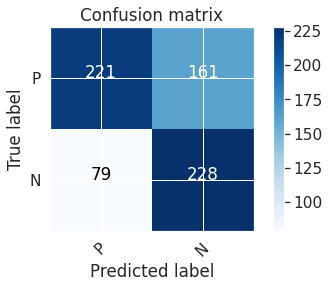

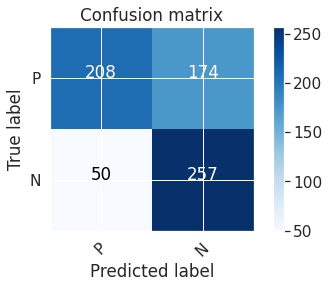

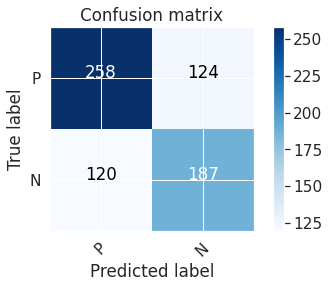

In [ ]:
cl1 = df.pred1_probs > 0.36
cm1 = confusion_matrix(df.target, cl1)
plot_confusion_matrix(cm1, ['P', 'N'])

cl2 = df.pred2_probs > 0.27
cm2 = confusion_matrix(df.target, cl2)
plot_confusion_matrix(cm2, ['P', 'N'])

cl3 = df.pred3_probs > 0.5 - 0.24
cm3 = confusion_matrix(df.target, cl3)
plot_confusion_matrix(cm3, ['P', 'N'])

**Выводы:** Наилучшая модель -- вторая

Наша цель может звучать и по-другому:
    
* **Вариант 2**: среди тех, кому модель выдает кредит, должно быть меньше всего ошибок (мало людей, кто его на самом деле не вернет - на них будем терять деньги). 
    При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того точность должна быть как можно больше (число в правом верхнем квадрате матрицы ошибок минимально).

**Задание 7.** Для каждого алгоритма найдите порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной точности можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65? 

In [ ]:
print(max_metrics(df.pred1_probs, max='precision'))
print(max_metrics(df.pred2_probs, max='precision'))
print(max_metrics(df.pred3_probs, max='precision'))

(0.737, 0.54)
(0.837, 0.73)
(0, 0)


У третьего алгоритма отсутствует такой порог принятия решения для которого accuracy  ≥  0.65. 

Ближайший порог:

In [ ]:
res, best_eps, acc = (0, 0, 0)
for eps in np.arange(0.01, 0.5, 0.01):
  cl = df.pred3_probs > 0.5 + eps
  accuracy_new = accuracy_score(df.target, cl)
  res_new = precision_score(df.target, cl)
  if accuracy_new >= acc and res_new > res:
    res = res_new
    acc = accuracy_new
    best_eps = eps
np.round(res, 3), np.round(best_eps, 2), acc

(0.705, 0.03, 0.6429608127721336)

**Задание 8.** Нарисуйте матрицы ошибок для каждого из алгоритмов с найденными значениями порога. Какая модель лучше всех справилась с этой задачей?

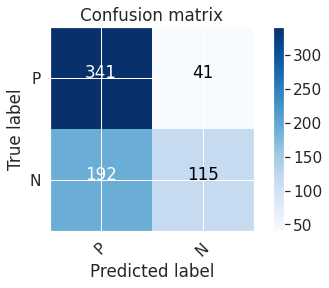

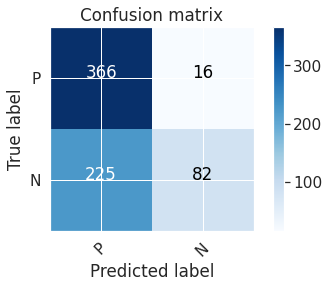

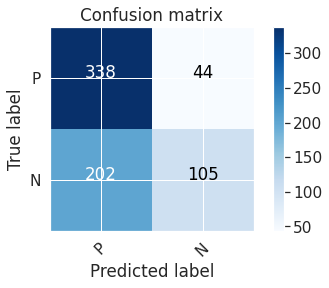

In [ ]:
cl1 = df.pred1_probs > 0.54
cm1 = confusion_matrix(df.target, cl1)
plot_confusion_matrix(cm1, ['P', 'N'])

cl2 = df.pred2_probs > 0.73
cm2 = confusion_matrix(df.target, cl2)
plot_confusion_matrix(cm2, ['P', 'N'])

cl3 = df.pred3_probs > 0.5 + 0.03
cm3 = confusion_matrix(df.target, cl3)
plot_confusion_matrix(cm3, ['P', 'N'])

**Выводы:** Наилучшая модель -- вторая

Также (**Вариант 3**) можно потребовать, чтобы и точность, и полнота были высокими, то есть обе ошибки в матрице ошибок были маленькие. Как вариант - можно максимизировать F1-score (среднее гармоническое между точностью и полнотой).

**Задание 9.** Найдите пороги для достижения максимального F1-score для каждой из трех моделей и нарисуйте матрицы ошибок. Какая модель решает поставленную задачу лучше остальных?

In [ ]:
print(max_metrics(df.pred1_probs, max='f1'))
print(max_metrics(df.pred2_probs, max='f1'))
print(max_metrics(df.pred3_probs, max='f1'))

(0.655, 0.36)
(0.699, 0.32)
(0, 0)


У третьего алгоритма отсутствует такой порог принятия решения для которого accuracy  ≥  0.65. 

Ближайший порог:

In [ ]:
res, best_eps, acc = (0, 0, 0)
for eps in np.arange(0.01, 1, 0.01):
  cl = df.pred3_probs > eps
  accuracy_new = accuracy_score(df.target, cl)
  res_new = f1_score(df.target, cl)
  if accuracy_new >= acc and res_new > res:
    res = res_new
    acc = accuracy_new
    best_eps = eps
np.round(res, 3), np.round(best_eps, 2), acc

(0.644, 0.15, 0.5529753265602322)

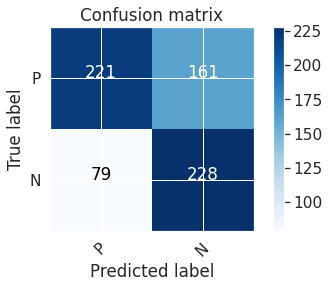

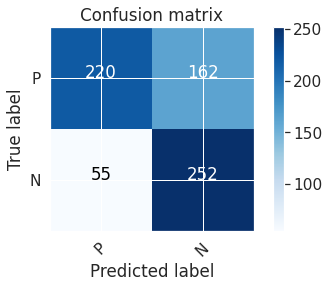

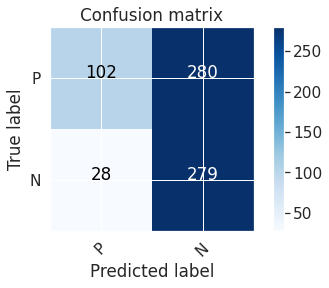

In [ ]:
cl1 = df.pred1_probs > 0.36
cm1 = confusion_matrix(df.target, cl1)
plot_confusion_matrix(cm1, ['P', 'N'])

cl2 = df.pred2_probs > 0.32
cm2 = confusion_matrix(df.target, cl2)
plot_confusion_matrix(cm2, ['P', 'N'])

cl3 = df.pred3_probs > 0.15
cm3 = confusion_matrix(df.target, cl3)
plot_confusion_matrix(cm3, ['P', 'N'])

**Выводы:** Наилучшая модель -- вторая

#### Кстати

В python есть удобная функция classification_report, которая выводит значения нескольких метрик.

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(df['target'],df['pred1_classes']))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       382
           1       0.69      0.44      0.53       307

    accuracy                           0.66       689
   macro avg       0.67      0.64      0.63       689
weighted avg       0.67      0.66      0.65       689



### Обучим свою модель для предсказания target.

**Задание 10.** Отнормируйте признаки в задаче и обучите логистическую регрессию предсказывать target.

In [ ]:
X = df[list(map(str, range(14)))]
X = ss.fit_transform(X)
y = df.target

logit = LogisticRegression()
logit.fit(X, y)
logit_probs = logit.predict_proba(X)[:,1]

**Задание 11.** Подберите порог для перевода предсказания в классы, чтобы максимизировать:
    а) точность 
    б) полноту 
    в) f1-score. 
Лучше ли логистическая регрессия справилась с задачей, чем три готовые модели, предсказания которых мы анализировали выше?

In [ ]:
a = max_metrics(logit_probs, 'precision')[0]
b = max_metrics(logit_probs, 'recall')[0]
c = max_metrics(logit_probs, 'f1')[0]
print(f'precision: {a}, recall: {b}, F1: {c}')

precision: 0.976, recall: 0.987, F1: 0.869


Логистическая регрессия показала лучший результат при максимизации каждой из трех метрик